In [1]:
## Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
## Read the data
df = pd.read_csv('heart.csv')
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [3]:
## Split the data into train and test
from sklearn.model_selection import train_test_split

X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

print(X_train.shape)
print(X_test.shape)

(642, 11)
(276, 11)


In [4]:
## One Hot Encoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

cat_cols = ["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]
transformer = make_column_transformer((OneHotEncoder(), cat_cols), remainder='passthrough')

X_train_enc = transformer.fit_transform(X_train)
X_test_enc = transformer.transform(X_test)

df_train_enc = pd.DataFrame(X_train_enc, columns=transformer.get_feature_names_out())
df_test_enc = pd.DataFrame(X_test_enc, columns=transformer.get_feature_names_out())

df_train_enc.head(10)
df_test_enc.head(10)

,onehotencoder__Sex_F,onehotencoder__Sex_M,onehotencoder__ChestPainType_ASY,onehotencoder__ChestPainType_ATA,onehotencoder__ChestPainType_NAP,onehotencoder__ChestPainType_TA,onehotencoder__RestingECG_LVH,onehotencoder__RestingECG_Normal,onehotencoder__RestingECG_ST,onehotencoder__ExerciseAngina_N,onehotencoder__ExerciseAngina_Y,onehotencoder__ST_Slope_Down,onehotencoder__ST_Slope_Flat,onehotencoder__ST_Slope_Up,remainder__Age,remainder__RestingBP,remainder__Cholesterol,remainder__FastingBS,remainder__MaxHR,remainder__Oldpeak
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,58.0,114.0,318.0,0.0,140.0,4.4
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,56.0,128.0,223.0,0.0,119.0,2.0
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,51.0,140.0,298.0,0.0,122.0,4.2
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,53.0,180.0,285.0,0.0,120.0,1.5
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,63.0,185.0,0.0,0.0,98.0,0.0
5,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,50.0,170.0,209.0,0.0,116.0,0.0
6,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,58.0,112.0,230.0,0.0,165.0,2.5
7,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,62.0,131.0,0.0,0.0,130.0,0.1
8,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,37.0,120.0,260.0,0.0,130.0,0.0
9,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,64.0,170.0,227.0,0.0,155.0,0.6


In [5]:
## Min Max Scaler
from sklearn.preprocessing import MinMaxScaler

mm_scaler = MinMaxScaler()
mm_scaler.fit(X_train_enc)
X_train_mmscaled = mm_scaler.transform(X_train_enc)
X_test_mmscaled = mm_scaler.transform(X_test_enc)

print("Minimum before scaling:\n{}".format(X_train_enc.min(axis=0)))
print("Maximum before scaling:\n {}".format(X_train_enc.max(axis=0)))
print("Minimum after scaling:\n {}".format(X_train_mmscaled.min(axis=0)))
print("Maximum after scaling:\n {}".format(X_train_mmscaled.max(axis=0)))

Minimum before scaling:
[ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 28.  80.   0.   0.  60.  -2.6]
Maximum before scaling:
 [  1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
   1.    1.   76.  200.  603.    1.  202.    6.2]
Minimum after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Maximum after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [6]:
## Standard Scaler
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
X_train_stdscaled = std_scaler.fit_transform(X_train_enc)
X_test_stdscaled = std_scaler.transform(X_test_enc)

print("Mean before scaling:\n {}".format(X_test_enc.mean(axis=0)))
print("Mean after scaling:\n {}".format(X_test_stdscaled.mean(axis=0)))
print("Standard deviation before scaling:\n {}".format(X_train_enc.std(axis=0)))
print("Standard deviation after scaling:\n {}".format(X_train_stdscaled.std(axis=0)))

Mean before scaling:
 [2.06521739e-01 7.93478261e-01 5.50724638e-01 1.95652174e-01
 2.02898551e-01 5.07246377e-02 2.10144928e-01 6.23188406e-01
 1.66666667e-01 5.79710145e-01 4.20289855e-01 9.78260870e-02
 5.18115942e-01 3.84057971e-01 5.37246377e+01 1.32456522e+02
 2.02688406e+02 2.42753623e-01 1.36050725e+02 9.45289855e-01]
Mean after scaling:
 [-0.01301059  0.01301059  0.02987497  0.02649058 -0.06205426  0.00404553
  0.01904338  0.06366074 -0.0963536  -0.04719554  0.04719554  0.18147537
  0.04869672 -0.13285739  0.03284746  0.00484694  0.04990528  0.03280011
 -0.04307311  0.07757281]
Standard deviation before scaling:
 [  0.40861065   0.40861065   0.49871488   0.38858792   0.42017116
   0.21762304   0.40185708   0.49148177   0.40414483   0.48931727
   0.48931727   0.23006605   0.49996118   0.49750935   9.30466404
  17.70297375 111.42468453   0.42017116  25.18483727   1.06775546]
Standard deviation after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [7]:
## Robust Scaler
from sklearn.preprocessing import RobustScaler

rb_scaler = RobustScaler()
X_train_rbscaled = rb_scaler.fit_transform(X_train_enc)
X_test_rbscaled = rb_scaler.transform(X_test_enc)

In [8]:
## SVM with One Hot Encoder
from sklearn.svm import SVC

svm = SVC(C=100, gamma=0.1)
svm.fit(X_train_enc, y_train)
print("Accuracy on training set: {:.3f}".format(svm.score(X_train_enc, y_train)))
print("Accuracy on test set: {:.3f}".format(svm.score(X_test_enc, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.620


In [9]:
## SVM with All Scalers

svm.fit(X_train_mmscaled, y_train)
print("[ MinMaxScaler ]")
print("Accuracy on training set: {:.2f}".format(svm.score(X_train_mmscaled, y_train)))
print("Accuracy on test set: {:.2f}".format(svm.score(X_test_mmscaled, y_test)))

svm.fit(X_train_stdscaled, y_train)
print("[ StandardScaler ]")
print("Accuracy on training set: {:.2f}".format(svm.score(X_train_stdscaled, y_train)))
print("Accuracy on test set: {:.2f}".format(svm.score(X_test_stdscaled, y_test)))

svm.fit(X_train_rbscaled, y_train)
print("[ RobustScaler ]")
print("Accuracy on training set: {:.2f}".format(svm.score(X_train_rbscaled, y_train)))
print("Accuracy on test set: {:.2f}".format(svm.score(X_test_rbscaled, y_test)))

[ MinMaxScaler ]
Accuracy on training set: 0.92
Accuracy on test set: 0.85
[ StandardScaler ]
Accuracy on training set: 1.00
Accuracy on test set: 0.84
[ RobustScaler ]
Accuracy on training set: 0.99
Accuracy on test set: 0.80


In [10]:
## PCA Before
svm = SVC(C=10, gamma=0.1, kernel='rbf')
svm.fit(X_train_enc, y_train)
print("Accuracy on training set: {:.2f}".format(svm.score(X_train_enc, y_train)))
print("Accuracy on test set: {:.2f}".format(svm.score(X_test_enc, y_test)))

Accuracy on training set: 1.00
Accuracy on test set: 0.62


Variances (percentage): [2.22518648e-01 1.03965499e-01 9.29037134e-02 7.39939075e-02
 6.76571944e-02 6.38082473e-02 5.92322795e-02 5.67814555e-02
 5.02878073e-02 4.35969568e-02 4.23350411e-02 4.12266584e-02
 3.11877096e-02 2.83322437e-02 2.21726387e-02 1.25731354e-31
 3.51370115e-32 2.88761130e-32 5.71689686e-33 3.78030709e-33]
Cumulative variances (percentage): [ 22.2518648   32.64841469  41.93878603  49.33817678  56.10389622
  62.48472095  68.4079489   74.08609445  79.11487518  83.47457085
  87.70807496  91.8307408   94.94951176  97.78273613 100.
 100.         100.         100.         100.         100.        ]


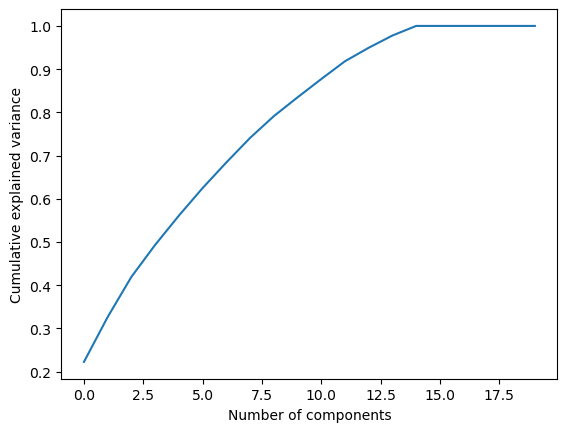

In [11]:
## PCA After
from sklearn.decomposition import PCA

pca = PCA(n_components=None)
pca.fit(X_train_stdscaled)

print("Variances (percentage): {}".format(pca.explained_variance_ratio_))
print("Cumulative variances (percentage): {}".format(np.cumsum(pca.explained_variance_ratio_) * 100))

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [12]:
## PCA with SVM and Pipeline
from sklearn.pipeline import Pipeline

pca = PCA(n_components=11)
model = SVC(C=10, gamma=0.1)
svm_model = Pipeline([('std_scaler', std_scaler), ('pca', pca), ('svm', model)])

svm_model.fit(X_train_enc, y_train)

print("Accuracy on training set: {:.2f}".format(svm_model.score(X_train_enc, y_train)))
print("Accuracy on test set: {:.2f}".format(svm_model.score(X_test_enc, y_test)))

Accuracy on training set: 0.95
Accuracy on test set: 0.86


X_train.shape: (642, 20)
X_train_skb.shape: (642, 15)
Selected features: Index(['onehotencoder__Sex_F', 'onehotencoder__Sex_M',
       'onehotencoder__ChestPainType_ASY', 'onehotencoder__ChestPainType_ATA',
       'onehotencoder__ChestPainType_NAP', 'onehotencoder__ExerciseAngina_N',
       'onehotencoder__ExerciseAngina_Y', 'onehotencoder__ST_Slope_Flat',
       'onehotencoder__ST_Slope_Up', 'remainder__Age', 'remainder__RestingBP',
       'remainder__Cholesterol', 'remainder__FastingBS', 'remainder__MaxHR',
       'remainder__Oldpeak'],
      dtype='object')


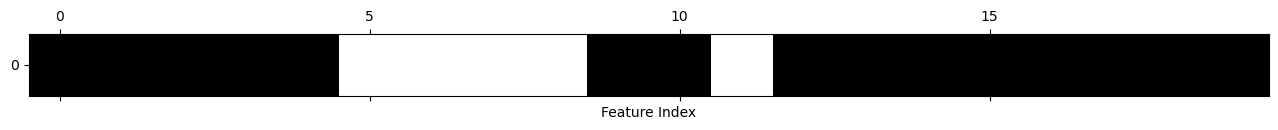

In [13]:
## Select K-Best
from sklearn.feature_selection import SelectKBest

skb = SelectKBest(k=15)
skb.fit(X_train_stdscaled, y_train)

X_train_skb = skb.transform(X_train_stdscaled)

print("X_train.shape: {}".format(X_train_stdscaled.shape))
print("X_train_skb.shape: {}".format(X_train_skb.shape))

mask = skb.get_support()
print("Selected features: {}".format(df_train_enc.columns[mask]))

plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Feature Index")
plt.yticks([0])
plt.show()

In [14]:
## Logistic Regression with Select K-Best and No Scaler
from sklearn.linear_model import LogisticRegression

X_test_skb = skb.transform(X_test_stdscaled)

logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train_enc, y_train)
print("Accuracy on test set (All Features): {:.2f}".format(logreg.score(X_test_enc, y_test)))

logreg.fit(X_train_skb, y_train)
print("Accuracy on test set (K-Best): {:.2f}".format(logreg.score(X_test_skb, y_test)))

Accuracy on test set (All Features): 0.87
Accuracy on test set (K-Best): 0.87


X_train.shape: (642, 20)
X_train_sp.shape: (642, 6)
Selected features: Index(['onehotencoder__ChestPainType_ASY', 'onehotencoder__ExerciseAngina_N',
       'onehotencoder__ExerciseAngina_Y', 'onehotencoder__ST_Slope_Flat',
       'onehotencoder__ST_Slope_Up', 'remainder__Oldpeak'],
      dtype='object')


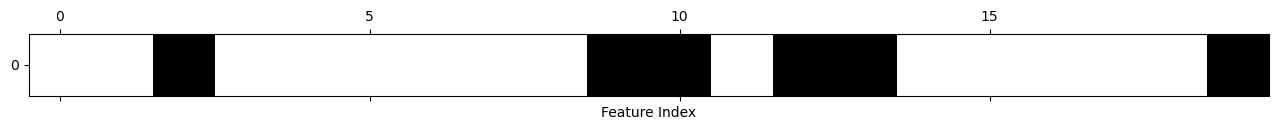

In [15]:
## Select Percentile
from sklearn.feature_selection import SelectPercentile

sp = SelectPercentile(percentile=30)
sp.fit(X_train_mmscaled, y_train)

X_train_sp = sp.transform(X_train_mmscaled)
print("X_train.shape: {}".format(X_train_mmscaled.shape))
print("X_train_sp.shape: {}".format(X_train_sp.shape))

mask = sp.get_support()
print("Selected features: {}".format(df_train_enc.columns[mask]))

plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Feature Index")
plt.yticks([0])
plt.show()

In [16]:
## Logistic Regression with Select Percentile and No Scaler
X_test_sp = sp.transform(X_test_mmscaled)

logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train_enc, y_train)
print("Accuracy on test set (All Features): {:.2f}".format(logreg.score(X_test_enc, y_test)))
logreg.fit(X_train_sp, y_train)
print("Accuracy on test set (Percentile): {:.2f}".format(logreg.score(X_test_sp, y_test)))

Accuracy on test set (All Features): 0.87
Accuracy on test set (Percentile): 0.87


X_train.shape: (642, 20)
X_train_sfm.shape: (642, 10)
Selected features: Index(['onehotencoder__ChestPainType_ASY', 'onehotencoder__ExerciseAngina_N',
       'onehotencoder__ExerciseAngina_Y', 'onehotencoder__ST_Slope_Flat',
       'onehotencoder__ST_Slope_Up', 'remainder__Age', 'remainder__RestingBP',
       'remainder__Cholesterol', 'remainder__MaxHR', 'remainder__Oldpeak'],
      dtype='object')


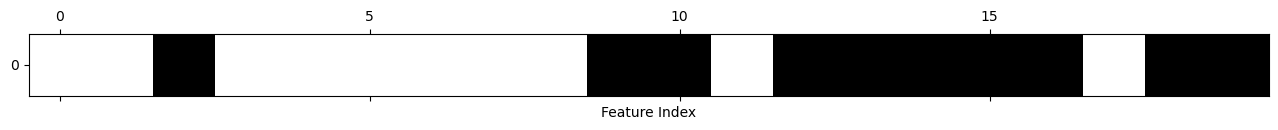

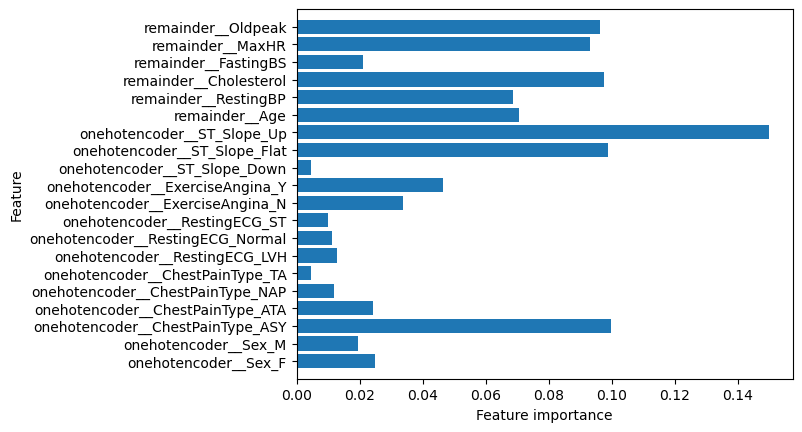

In [17]:
## Model-Based Feature Selection
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

sfm = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=0), threshold='median')
sfm.fit(X_train_enc, y_train)

X_train_sfm = sfm.transform(X_train_enc)
print("X_train.shape: {}".format(X_train_enc.shape))
print("X_train_sfm.shape: {}".format(X_train_sfm.shape))

mask = sfm.get_support()
print("Selected features: {}".format(df_train_enc.columns[mask]))
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Feature Index")
plt.yticks([0])
plt.show()


def plot_feature_importances(classifier, dataset, n_features):
    plt.barh(range(n_features), classifier.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), dataset.columns.values)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)


plot_feature_importances(sfm.estimator_, df_train_enc, df_train_enc.shape[1])

In [18]:
## Logistic Regression with Model-Based Feature Selection and No Scaler
X_test_sfm = sfm.transform(X_test_enc)

logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train_enc, y_train)
print("Accuracy on test set (All Features): {:.2f}".format(logreg.score(X_test_enc, y_test)))
logreg.fit(X_train_sfm, y_train)
print("Accuracy on test set (Model-Based): {:.2f}".format(logreg.score(X_test_sfm, y_test)))

Accuracy on test set (All Features): 0.87
Accuracy on test set (Model-Based): 0.88


Selected features: Index(['onehotencoder__Sex_F', 'onehotencoder__Sex_M',
       'onehotencoder__ChestPainType_ASY', 'onehotencoder__ChestPainType_ATA',
       'onehotencoder__RestingECG_LVH', 'onehotencoder__ExerciseAngina_N',
       'onehotencoder__ExerciseAngina_Y', 'onehotencoder__ST_Slope_Flat',
       'onehotencoder__ST_Slope_Up', 'remainder__Age', 'remainder__RestingBP',
       'remainder__Cholesterol', 'remainder__FastingBS', 'remainder__MaxHR',
       'remainder__Oldpeak'],
      dtype='object')


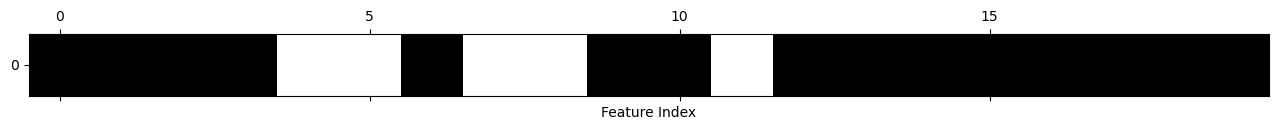

In [19]:
## Iterative Feature Selection
from sklearn.feature_selection import RFE

srfe = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=15)
srfe.fit(X_train_enc, y_train)

mask = srfe.get_support()
print("Selected features: {}".format(df_train_enc.columns[mask]))
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Feature Index")
plt.yticks([0])
plt.show()

In [20]:
## Logistic Regression with Iterative Feature Selection and No Scaler
X_train_srfe = srfe.transform(X_train_enc)
X_test_srfe = srfe.transform(X_test_enc)

logreg = LogisticRegression(max_iter=10000)

# Before Feature Selection
logreg.fit(X_train_enc, y_train)
print("Accuracy on test set (All Features): {:.3f}".format(logreg.score(X_test_enc, y_test)))

# After Feature Selection
logreg.fit(X_train_srfe, y_train)
print("Accuracy on test set (RFE): {:.3f}".format(logreg.score(X_test_srfe, y_test)))

Accuracy on test set (All Features): 0.870
Accuracy on test set (RFE): 0.870
